# Udaicty Machine learning Nanodegree
## Reinforcement learning
## Train the smartcab to drive



-----

In this project, you will build an optimized Q-Learning driver, which will manipulate the smart taxi to reach its destination through its surroundings. Because people expect smart taxis to carry passengers from one place to another, the driving agent evaluates with two very important indicators: security and reliability. The driver's agent still makes the smart taxi drive to the destination or reluctantly avoid the accident and is considered insecure when the red light is on. Similarly, the driving agent frequently can not reach the destination in a timely manner and is considered unreliable. Maximizing the safety and reliability of the driving agent ensures that smart taxis will gain long-term status in the transportation industry.

The safety and reliablity can be measured in Letter as follow：

| Level 	| Safety 	| Reliablity 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| The agent does not have any harm to traffic，<br/>And always be able to choose the right action.| The number of times the agent has reached its destination within a reasonable time <br /> 100% of the number of driving times. |
|   A   	|The agent has little minor damage to the traffic behavior, such as the green light when unable to move.| The number of times the agent has reached the destination within a reasonable time <br /> 90% of the number of driving times.
|   B   	| The agent program frequently has a slight disturbance of traffic behavior, such as a green light when it can not move.| The agent program frequently has a slight disturbance of traffic behavior, such as a green light when it can not move. |
|   C   	| The agent has at least one major obstruction of traffic behavior, such as running a red light.| The number of times the agent has reached its destination within a reasonable time <br /> accounts for 70% of the number of driving times. |
|   D   	| The agent causes at least one minor accident, such as a green light, to turn left when there is a vehicle on the opposite side.| The number of times the agent has reached its destination within a reasonable time <br /> accounts for 60% of the number of driving times. .
|   F   	| The agent causes at least one major accident, such as a red light when there is a cross traffic.	| The number of times the agent has reached its destination within a reasonable time <br /> failed to reach 60% of the number of driving times. |



In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the code
In addition to understanding the world, but also need to understand the world, simulation procedures, and so how to operate the code itself. If you do not want to explore the "hidden" * device, try to create a driving agent will be difficult. In the top of the `/ smartcab /` directory, there are two folders: `/ logs /` (which will be used later) and `/ smartcab /`. Open the `/ smartcab /` folder, explore each of the following Python files, and then answer the following questions

### Question2
- * In the * `agent.py` * Python file, select 3 flag that can be set and describe how they change the simulation program. *
- * In the * `environment.py` * Python file, when the agent executes an action, which environment class function is called? *
- * What is the difference between * `` render_text () '*' and * `` render () '`* function in *` simulator.py` * Python file?
- * In * `planner.py` * Python file, *` 'next_waypoint () `* function will first consider north-south or east-west direction? *

Answer: learning are set to True when using Q learning, epsilon: Q Learning the attenuation factor, which determines how much probabilities the program explores the new strategy, alpha: the learning rate, determines the agent's learning rate agent to perform an action , The render function called the render function render_text () function in the interactive command line shows the action and status information, and render () function is through the GUI graphical interface display next_waypoint () first consider the east and west direction

-----
## Create a fundmental agent
The first step in creating a driving agent to optimize Q-Learning is to allow the agent to actually perform effective actions. In this case, a valid action is `None` (no action),` 'Left'` (turn left), `` Right'` (right) or `` Forward'` (forward). As your first implementation, go to the `` choose_action () '`proxy function so that the driving agent randomly selects one of the actions. Note that you will access several class member variables that will help you write this function, such as `` self.learning'` and `` self.valid_actions'`. Immediately after running, run the agent files and simulations several times to confirm that your driver's agent performs random actions on each step.


###Basic agent simulation results
To get the results from the initial simulation program, you need to adjust the following flags.
- `'enforce_deadline'` - sets this flag to` True` to force the driver agent to capture whether it has reached its destination within a reasonable time.
- `'update_delay'` - Set this flag to a smaller value (eg` 0.01') to reduce the time between each step in each test.
- `'log_metrics'` - Set this flag to` True` to record the simulation results as a `.csv` file in the` / logs / `directory.
- `` n_test'` - set this flag to `` 10'` to perform 10 test tests.

After you have successfully completed the initial simulation (with 20 training tests and 10 test tests), run the following code cell to visualize the results. Note that when running the same simulation, the log file will be overwritten, so pay attention to the log file being loaded! Run the agent.py file under projects / smartcab.

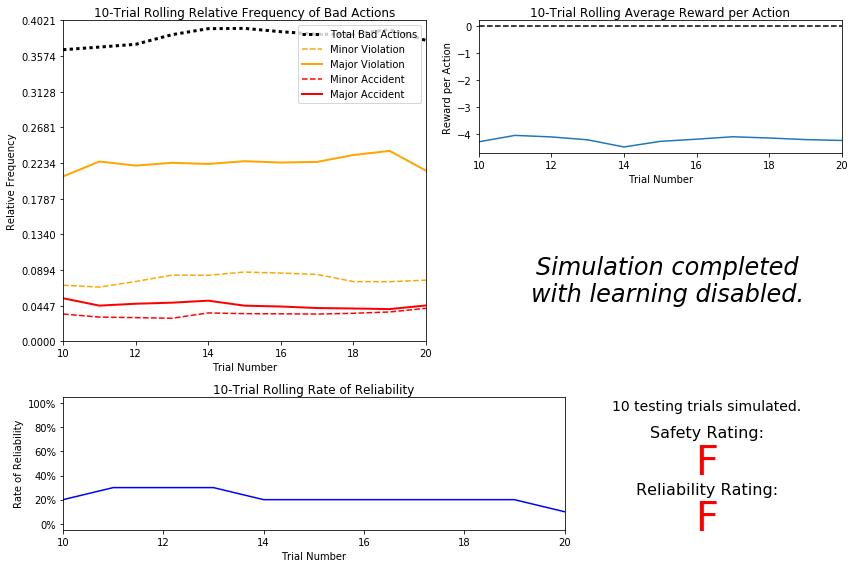

In [5]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization results from your initial simulations above, you give an analysis of the driving agent and a number of observations. Make sure you give at least one observation for each panel on the visualization results. You can consider some of the situation:
- How does the driving agent make frequent decisions? How many bad decisions have caused the accident? *
- * assume that the agent is random driving, then the reliability rate is reasonable? *
- What kind of reward will the agency get for its actions? Does the reward show that it has received serious penalties? *
- * Is there a significant change in the result output as the number of trials increases? *
- Is this smart taxi to be safe and / or reliable for passengers? Why or why not? *

Answer:
1. The frequency of the decision-making of the driving agent is about 38%, and about 10% of the total has caused the accident, so more than 25% of the bad behavior has caused the accident. The reliability of the random driving is basically reasonable, not more than 30% 3. After each decision-making process will receive a reward reward, the figure is the absolute value of the larger negative score, indicating that it has been severely punished 4 . The number of experiments increases the output without significant changes. 5. This smart taxi is unsafe and unreliable because its safety and reliability levels are at the lowest F level and can cause frequent traffic accidents.

-----
## Announce the driving agent
The second step in creating a driving agent that optimizes Q-Learning is to define the state in which a series of agents will occur in the environment. Depending on the input, perceived data, and the variables available to the driver, you can define a series of states for the agent so that it can * learn * which action it needs to perform in a state. For each state of the `` if this is in the state of the action '`condition is called ** strategy **, that is the final driving agent to learn. Without the state, the driver does not understand which action is optimal - or even does not understand which environment variables and conditions it will focus on!

Look at the `'build_state ()'` proxy function, which shows that the driving agent function can get the following data from the environment:
- `'waypoint'`, * smart taxi * to the destination should be the direction of the trip, it is * smart taxi * front direction relative value.
- `` inputs'`, * smart taxi * perceptron data. it includes 
   - `` light'`, traffic light color.
   - `` left'`, * smart taxi * the direction of the direction of the left side of the vehicle. If there is no vehicle, it returns `None`.
   - `` right'`, * smart taxi * right direction of the direction of the vehicle. If there is no vehicle, it returns `None`.
   - `'oncoming'`, * smart taxi * cross direction direction of vehicle direction. If there is no vehicle, it returns `None`.
- `` deadline'`, * Smart Taxi * The number of remaining actions required to reach the destination within time.### Recoginize State


### Question4
*What are the available features of the agent and the learning ** safety ** and ** efficiency ** the highest correlation? Why do you think these features fit in the environment for the ** smart taxi ** modeling? What if you did not choose some of the features and give up their reasons?*

Answer: 'waypoint', 'light' and 'oncoming', 'left' are the most relevant in terms of safety and efficiency, because it is the fundamental feature of determining the safety of the taxi because it is able to avoid colliding with the vehicle in the cross direction. Waypoint ensures that the taxi can travel in the right direction to reach the destination, and the deadline value range is too large, will cause the feature space is too large to learn, so do not use, if the 'left' and 'right' at the same time Considering the situation, will lead to the state space is too large, the experimental results of the model to find the study but declined.As for the choice of left or right, from the experimental results almost. So the state of choice is 'waypoint', 'left', 'light', 'oncoming'

### Define the state space
When defining a series of agents will be in the state, you must consider the state space * size *. That is, if you expect the driver to learn a ** strategy for each state, you will need to have an optimal action for each agent state. If the number of possible states is very large, it will eventually become a situation where the driver's agent does not learn how to act in certain states and will lead to unaudited decisions. **

`

### Question 5
* What is the size of the state space if you define a state with the features you selected in ** 4? Assuming you understand the environment and how it is simulated, do you think that after a reasonable number of training, the agent can learn a better strategy? (Met most of the state can make the right decision.) *


** Answer :The range is {'forword', 'left', 'right'}, and 'left' is {'left', 'right', 'forword', None}, 'light The range of values is {'red', 'green'}, and the online range is {'left', 'right', 'forward', 'None'}, the state space is 3 * 4 * 2 * 96, after a reasonable number of training, the agent should be able to learn a better strategy.

### Update the driving agent state
To complete your second implementation, go to the `` build_state () '`proxy function. According to the judgment given in ** 4, you now want to set the `'state'` variable to a tuple containing all the features required for Q-Learning. Make sure that your driver's agent updates its status by running the agent program and the simulation, and is aware that the status is displayed. If you use the visual simulation, confirm the status of the update and see the same in the simulation program.



-----
## Implement Q-Learning driving agent
The third step in creating a driving agent that optimizes Q-Learning is to begin implementing Q-Learning's own functionality. The concept of Q-Learning is quite straightforward: the status of each visit, creating a record for all available states - action pairing in Q-table. Then, when the agent encounters a state and performs an action, the associated state-action pairing Q-value is updated based on the obtained update and the set update rule. Of course, Q-Learning also brings other benefits, so we can let the agent according to each possible state - action matching Q-values, for each state to select the best action. In this project, you will achieve a decay εε - greedy Q-learning algorithm, without discount factor. Follow the implementation instructions for each agent function under TODO.
Note that the proxy self.Q is a dictionary: this is the Q-table composition. Each state is a self.Q dictionary key, each value is another dictionary that contains action and Q-value.Here is an example：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```
Also, note that you are asking for a * attenuation * $ \ epsilon $ * (explorer) factor *. Thus, as the test increases, $ \ epsilon $ will decrease to zero. This is because the agent learns from its behavior and then acts according to the acquired behavior. And when $ \ epsilon $ reaches a certain threshold (the default threshold is 0.01), the agent is detected with what it has learned. As an initial Q-Learning implementation, you will implement a function with a linear attenuation $ \ epsilon $.

### Q-Learning stimulation result
To get the results from the initial Q-learning program, you need to adjust the following flags and settings:
- `'enforce_deadline'` - sets this flag to` True` to force the driver agent to capture whether it has reached its destination within a reasonable time.
- `'update_delay'` - Set this flag to a smaller value (eg` 0.01') to reduce the time between each step in each test.
- `'log_metrics'` - Set this flag to` True` to record the simulation results as `.csv` files in the` / logs / `directory, and Q-table as` .txt` files.
- `` n_test'` - set this flag to `` 10'` to perform 10 test tests.
- `` learning'` - set this flag to `` True'` to tell the driver to use your Q-Learning implementation.
In addition, use the following $ \ epsilon $ attenuation function:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you are having trouble with your implementation, try setting the `verbose'` flag to` True`. When debugging, the flags set here will return to their default settings. It is important that you understand what each logo does and explain how they affect the simulation!

When you have successfully completed the initial Q-Learning simulation program, run the following code cell to visualize the results. Note that when the same simulation run, log file will be overwritten, so pay attention to load the log file!

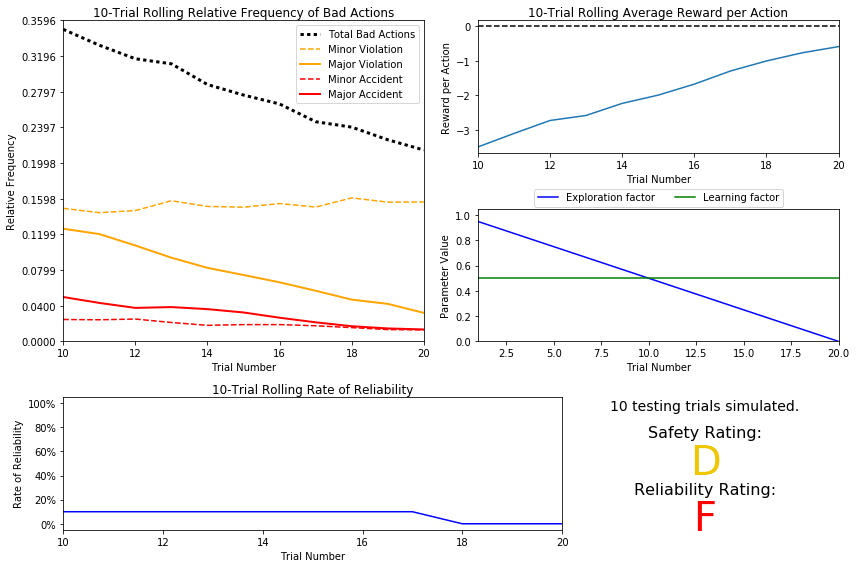

In [10]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization results from your default Q-Learning simulations above, you give an analysis and a number of observations about the driving agent, as in Question 3 **. Note that the simulation program should also produce a Q-table exists in a text file that can help you to observe the agent's algorithm. You can consider some of the situation:
- Is there a similarity between the basic driving agent and the default Q-Learning agent? *
- How much training test does the driver need to do before testing? Is this number reasonable at the given $ \ epsilon $ tolerance? *
- * Do you implement the $ \ epsilon $ (explorer factor) whether the damping function is displayed exactly in the parameter palette? *
- * As the number of trials increases, is the number of bad actions reduced? Is the average bonus increased? *
- What is the security and reliability score compared to the initial driving agent? *

### Answer
The reliability of the basic driving agent and Q-learning is kept at a very low level, and the reliability scores are F, and the accident rate remains essentially constant in the training. 2. The training experiment needs to be done 20 times. Basic and reasonable 3. The attenuation function is a linear function, accurate display in the figure 4. With the number of experiments increased, the bad action was significantly reduced, the average reward increased 5. Compared with the initial posture agent, the security level to upgrade to the D level, but Reliability level has not improved significantly

-----
## Improve Q-Learning driving agent
Creating a third step in optimizing the Q-Learning driver's agent is to perform optimization! Now that the Q-Learning algorithm has been implemented and the driving agent has been successfully studied, it is necessary to adjust the settings and adjust the parameters to let the driving agent learn ** ** ** and ** ** **. Often this step requires a lot of trials and mistakes, because some settings will definitely cause worse learning. One thing to keep in mind is the time of learning itself and the time required: theoretically, we can allow the agent to learn for a very long time; however, Q-Learning is another purpose that will not acquire behavior The trial test becomes an act of learning behavior. For example, the training always allows the agent to perform random actions (if $ \ epsilon = 1 $ and never decay) of course it can make it * learn *, but will not let it * act *. When improving your Q-Learning implementation, consider the meaning of making a particular adjustment, and whether it is logical or not.

### Improve Q-Learning driving agent performance
To get the results from the initial Q-learning program, you need to adjust the following flags and settings:
- `'enforce_deadline'` - sets this flag to` True` to force the driver agent to capture whether it has reached its destination within a reasonable time.
- `'update_delay'` - Set this flag to a smaller value (eg` 0.01') to reduce the time between each step in each test.
- `'log_metrics'` - Set this flag to` True` to record the simulation results as `.csv` files in the` / logs / `directory, and Q-table as` .txt` files.
- `` learning'` - set this flag to `` True'` to tell the driver to use your Q-Learning implementation.
- `'arranged'` - set this flag to` `True'` to tell the driver agent that you are implementing an optimized version of the Q-Learning implementation.

Optimize the additional flags that the Q-Learning agent can adjust:
- `` n_test'` - set this flag to a positive number (before 10) to perform so many test tests.
- `'alpha'` - sets this flag to a real number between 0 and 1 to adjust the learning rate of the Q-Learning algorithm.
- `epsilon'` - set this flag to a real number between 0 and 1 to adjust the initial exploratory factor of the Q-Learning algorithm.
- `` tolerance'` - sets this flag to a smaller value greater than 0 (default is 0.05) to set the test epsilon threshold.

Also, use a $ \ epsilon $ (explorer factor) attenuation function for your choice. Note that no matter which function you use, ** must be a reasonable rate of attenuation ** to `` tolerance '`. Q-Learning agent can start testing this time. An example of an attenuation function ($ t $ is the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

If you want, you can also use $ \ alpha $ (learning rate) of the attenuation function, of course, this is usually relatively rare. If you do that, make sure it satisfies the inequality $ 0 \ leq \ alpha \ leq 1 $.
If you are having trouble with your implementation, try setting the `verbose'` flag to` True`. When debugging, the flags set here will return to their default settings. It is important that you understand what each logo does and explain how they affect the simulation!

When you have successfully completed the initial Q-Learning simulation program, run the following code cell to visualize the results. Please note that in order to meet the project requirements you need to obtain at least a rating of A for security and reliability. Note that when the same simulation run, log file will be overwritten, so pay attention to load the log file!

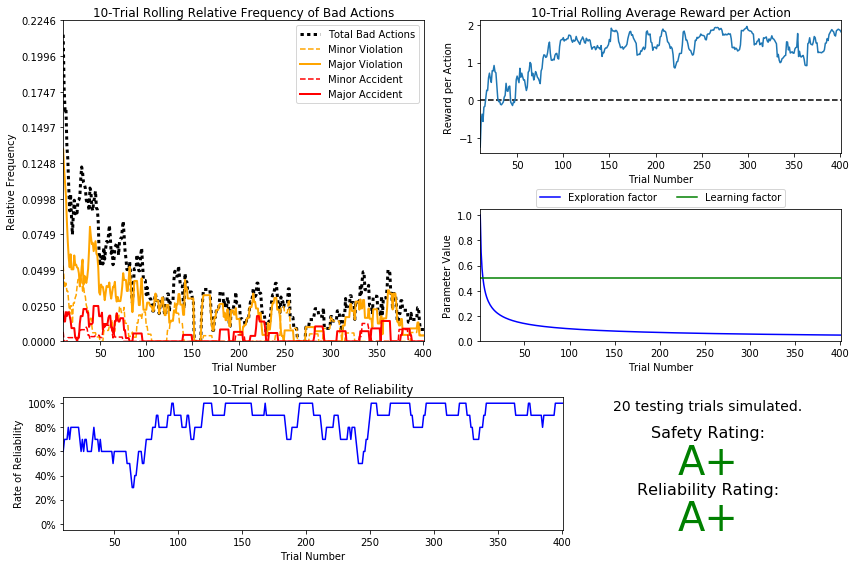

In [11]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization results obtained from your improved Q-Learning simulations above, the final analysis and observations about the improved driving agent are given as in ** 6 **. You need to answer the question:
What is the attenuation function of epsilon (explorer factor) used? *
- How much training test does the driver need to do before testing? *
- what value do you use epsilon-tolerance and alpha (learning rate)? why? *
- How much improvement does this Q-Learning learner compare to the previous Q-Learning learner? *
- Will you say that the results of the Q-Learning learner show that your driving agent has successfully studied a suitable strategy? *
- Are you satisfied with the safety and reliability score of * Smart Taxi *? *

** Answer: ** 1. Use the attenuation function of epsilon = 1 / sqrt (t)
2. Before the test need to do 400 training experiments
3.epsilon-tolerance = 0.05, alpha = 0.5, because the experiment found that taking smaller epsilon-tolerance on the experimental results did not improve, and alpha in the 0.4-0.6 near the experimental results are not big, take a compromise Of the learning rate is more useful, because if the learning rate is too small, the algorithm may be too lazy to learn, if the learning rate is too large algorithm will ignore the previous experience learned.
4. Compared with the previous Q-learning learner, this learner improves very much, reliability and security are raised to the A + level
5. After training, the agency's bad behavior frequency dropped to less than 5%, the reliability of more than 80%, indicating that the driving agent successfully learned the appropriate strategy
6. Intelligent taxi reliability and security have reached the highest level A +, I am very satisfied with the score

### Define the optimal strategy

Sometimes, for the important question * "What do I want my agent to learn?" * The answer is just theoretical and can not be described in detail. However, here, you can specifically define what the agent wants to learn, that is, the US Traffic Right Act. These laws are known to the information that you can based on these laws for the * smart taxi * to further define the optimal action for each state. In that case, we call this series of optimal states - action pairing for ** optimal strategy. Thus, unlike those theoretical responses, not only through the reward (punishment) received, but also pure observation, the agent is in the "wrong" action can be very clear that. If the agent breaks on the red light, we both see it get a negative reward and know that it's a wrong behavior. This can be used to help you verify that the driving agent's ** strategy is correct, or just a matter of priority.

### Question 8
Give some examples of what the optimal strategy looks like (with the state you have defined). After that, look at the `` sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _ The status of each record from the simulation, for a given state, ** strategy ** (the highest score of the action) is correct? Is there a strategy that is different from the expected optimal strategy for some states? _ Gives a state and record the state - the action of the reward, explain why it is the right strategy.

** Answer: ** I understand the best strategy is to ensure the safety of the premise as quickly as possible to the passengers to the destination, in order to obtain higher reliability.
Example: If the forward direction is forward and the semaphore is red, the action is None. If the waypoint is right and the semaphore is green, the action is right.
From the sim_improved-learning.txt file, most policies meet the best policy. But there are still some suboptimal strategies. For example:
('Left', 'green', 'forward', 'forward')
 - None: 0.00
 - forward: 1.31
 - right: 0.00
 - left: -9.70
The target direction is to the left, and in the case of green light, the agent's strategy has chosen straight

('Right', 'green', 'left', 'right')
 - None: 0.69
 - forward: 0.00
 - right: 0.00
 - left: 0.00
 Take this strategy as an example, the direction of the taxi is to the right, the signal light is green, but the taxi has chosen to stop, this is because the cross direction of the vehicle left, the left side of the vehicle to turn right, if the taxi at this time Choose the right turn, there may be security risks, so this case None action the highest score.

-----
###  Optional: Future Reward - Discount Factor`'gamma'`
Maybe you will be curious as part of the Q-Learning algorithm, before asking you in the implementation of ** do not ** use the discount primer `` gamma'`. Include future rewards in the algorithm can help reverse positive rewards in the future state back to the current state. In essence, if the driver's agent is given a number of actions to achieve a different state of choice, including future incentives will be the agent bias can get more reward status. An example is the driving agent for the purpose of driving: all actions and rewards are equal, then theoretically if the arrival of the destination will have additional incentives, the purpose of the trip will get a better reward. However, even in this project, the driving agent also arrives at the destination at the specified time, including future rewards that will not benefit the agent. In fact, if the agent to give a number of experimental learning, it will even have a negative impact on the Q-value!

### Optional Question 9
* There are two features in the project that make future rewards in this Q-Learning algorithm invalid. One characteristic is about * smart taxi * itself, the other is about the environment. Can you point out what they are and why are future rewards that will not work in this project? *

** Answer: ** Future rewards are a discount factor. If the starting and ending ends are fixed, the end state's reward will be traced back to the starting point, so that each point on the path gets an additional status reward value, but the starting point of the project and The end point is not fixed, the discount factor does not play this backtracking effect. In addition, we do not know how far the current position is from the end, and it can not accurately tell how each of the discount factors changes.